In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
##Getting data
df = pd.read_csv("dataset/Games_sales2021.csv")
df.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [41]:
##Checking columns
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [42]:
##Size of dataset
df.size

896224

In [43]:
##Getting all columns with nan values
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [44]:
##Droping unnecessary columns
df = df.drop(["img", "last_update"], axis=1)

In [45]:
##Table with necessary columns
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


In [46]:
##Adding new column with release year
df["release_year"] = df["release_date"].str.split("-").str.get(0)
df["release_year"]

0        2013
1        2014
2        2002
3        2013
4        2015
         ... 
64011    2016
64012    2020
64013    2020
64014    2019
64015     NaN
Name: release_year, Length: 64016, dtype: object

In [47]:
##Drop release date
df = df.drop("release_date", axis=1)
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [48]:
##Removing all info about games on consoles with low popularity
df["console"].unique()
df[df["console"].isin(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS','PSN', 'WiiU','Linux'])]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64008,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,2018
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2018
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [49]:
##Set critic score for GTA V on X360
df.at[3, "critic_score"] = 9.4
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019


Looks like Visual data rows have lots of NaN values in the sales columns. Need to check it

In [50]:
##Visual Novel data
df[df["genre"]=="Visual Novel"]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
7172,Steins;Gate,PSP,Visual Novel,Kadokawa Shoten,Nitro+,NaN,0.19,NaN,0.19,NaN,NaN,2011
8413,Psycho-Pass: Mandatory Happiness,PS4,Visual Novel,NIS America,5pb. Inc.,NaN,0.15,0.10,NaN,0.02,0.03,2016
8466,Tears to Tiara II: Heir of the Overlord,PS3,Visual Novel,NIS America,Sting,NaN,0.15,0.07,0.06,0.01,0.02,2014
8914,Utawarerumono: Mask of Truth,PS4,Visual Novel,Atlus,Aqua Plus,NaN,0.13,0.05,0.07,NaN,0.01,2017
9503,Fate/hollow ataraxia,PSV,Visual Novel,Type-Moon,Type-Moon,NaN,0.12,NaN,0.12,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019


As we can see Visual Novels have no sales data. So it needs to be removed

In [51]:
##Removing all visual novels 
mask = df["genre"]=="Visual Novel"
df = df[~mask]
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
63736,Yu-Gi-Oh! Master Duel,PS4,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63737,Yu-Gi-Oh! Master Duel,PC,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63738,Yu-Gi-Oh! Master Duel,XS,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63739,Yu-Gi-Oh! Master Duel,XOne,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
##Removing all nan values from dataset
df = df.dropna()
df.size

14532

In [53]:
##Reseting indexes
df = df.reset_index()
df = df.drop("index", axis=1)
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Virtua Striker 2002,GC,Sports,Sega,Amusement Vision,6.6,0.05,0.01,0.03,0.00,0.00,2002
1207,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.05,0.01,0.03,0.01,0.00,2007
1208,Metal Gear Solid: Digital Graphic Novel,PSP,Misc,Konami,Kojima Productions,7.6,0.04,0.02,0.02,0.00,0.00,2006
1209,Gotcha Force,GC,Shooter,Capcom,Capcom,5.8,0.03,0.01,0.01,0.00,0.00,2003


In [54]:
##Preparing data for genres analysis
studios = df.groupby(by="genre")["total_sales"].sum().sort_values(ascending=False).head(10)
studios

genre
Shooter             460.97
Action              386.99
Sports              247.92
Role-Playing        182.95
Racing              151.93
Fighting             79.25
Platform             71.04
Action-Adventure     60.45
Misc                 56.31
Adventure            54.52
Name: total_sales, dtype: float64

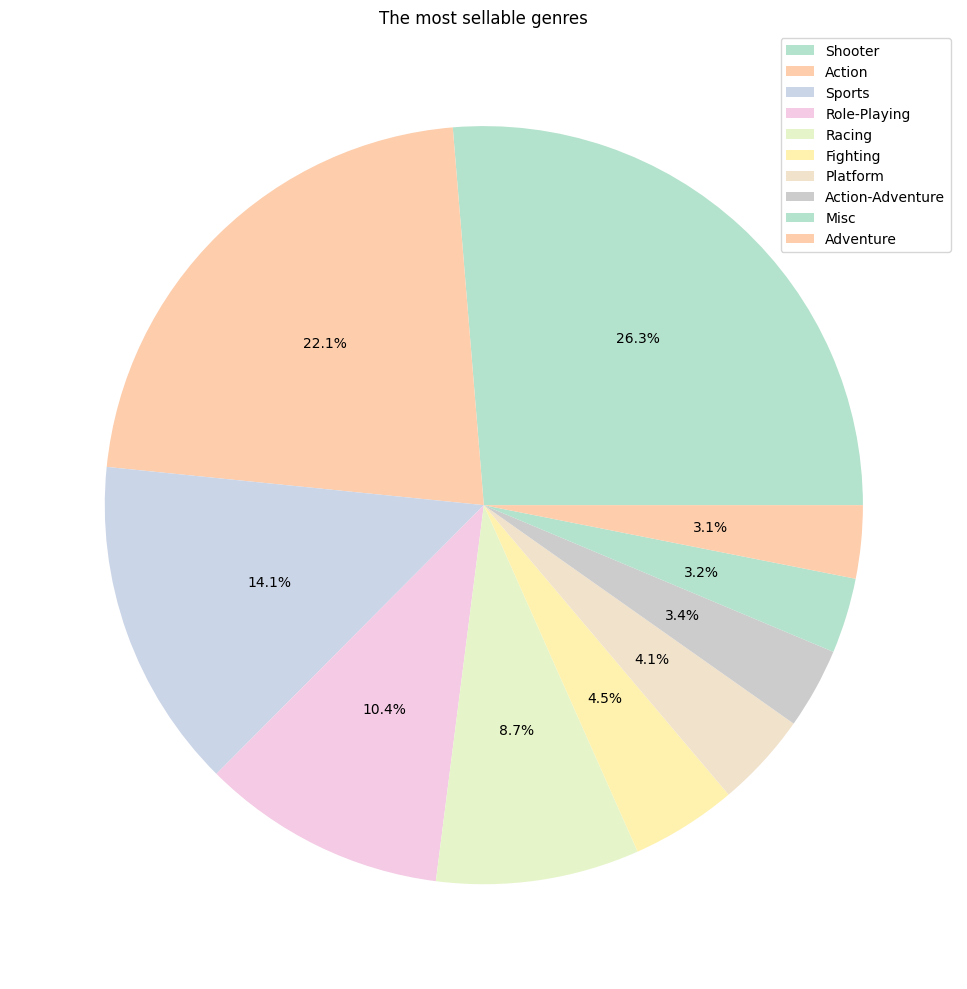

In [55]:
##Most popular genres
plot = plt.figure(figsize=(12,10))
plt.title("The most sellable genres")
plt.pie(studios, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors)
plt.legend(studios.index)
plt.tight_layout()
plt.savefig("images/genre_plot.png")
plt.show()

From the plot we can see that shooter, action and sport are the most sellable genres

In [56]:
##Choosing the data for console analysis
platform = df.groupby("console")["total_sales"].agg("sum").sort_values(ascending=False).head(10)
platform

console
PS3     450.68
X360    446.12
PS4     245.19
PS2     231.15
PS       93.04
PSP      69.34
Wii      60.42
DS       59.75
XOne     39.39
3DS      30.20
Name: total_sales, dtype: float64

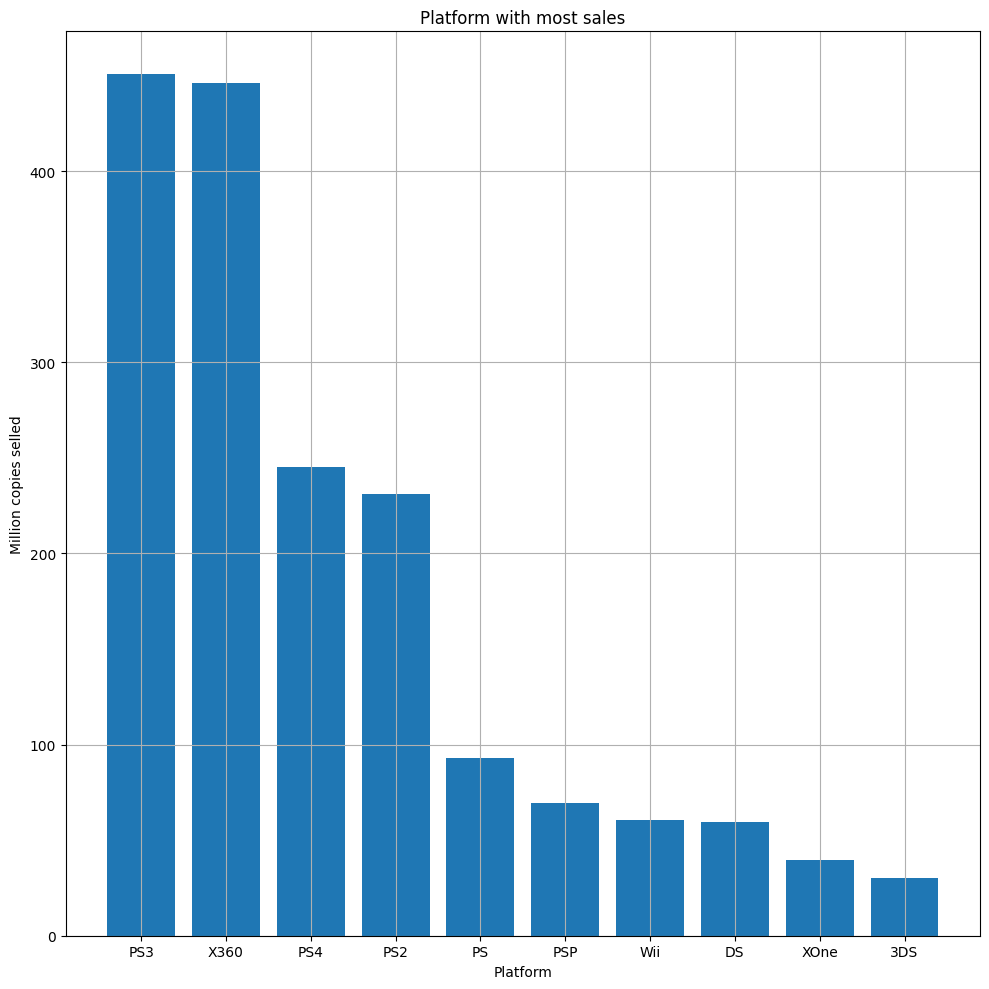

In [57]:
##The most popular platforms
plt.figure(figsize=(10,10))
plt.title("Platform with most sales")
plt.bar(platform.index, platform.values)
plt.xlabel("Platform")
plt.ylabel("Million copies selled")
plt.grid()
plt.tight_layout()
plt.savefig("images/platfrom_sales.png")
plt.show()

The most games were sold on the platforms PS3 XBOX360 and PS4 for the year 2021. The only next-gen platform is PS4. XBOX One isn't popular at all. It has less than 50 milion copies sold totally. 

In [58]:
##Preparing data for the region analysis
sales_by_region = df[["na_sales", "jp_sales", "pal_sales", "other_sales"]].sum().sort_values(ascending=False)
sales_by_region = sales_by_region.rename({"na_sales":"North America", "jp_sales":"Japan", "pal_sales":"Eu+Africa", "other_sales":"other regions"})
sales_by_region

North America    844.49
Eu+Africa        640.25
other regions    216.89
Japan            128.94
dtype: float64

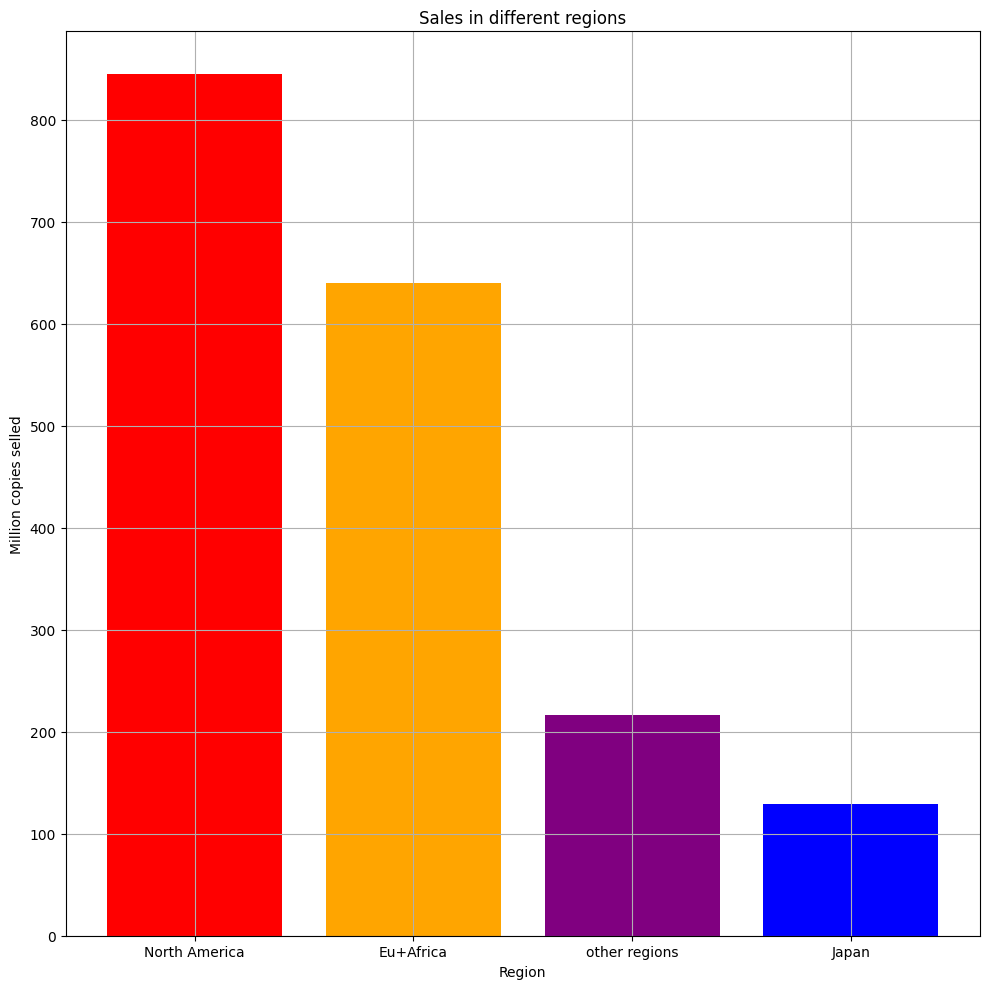

In [59]:
##Sales in all regions
plt.figure(figsize=(10,10))
plt.title("Sales in different regions")
plt.bar(sales_by_region.index, sales_by_region.values, color=["red", "orange", "purple", "blue"])
plt.xlabel("Region")
plt.ylabel("Million copies selled")
plt.grid()
plt.tight_layout()
plt.savefig("images/Sales_regions_plot.png")
plt.show()

The most profitable region is North America. The least sales is in Japan

In [60]:
##Making table showing the most popular sales by each region 
genres_by_region = df.groupby(by="genre")[["na_sales", "pal_sales", "jp_sales"]].sum()
genres_by_region

,na_sales,pal_sales,jp_sales
genre,,,
Action,182.27,136.17,22.80
Action-Adventure,23.40,25.96,2.42
Adventure,24.61,18.16,6.67
Board Game,0.06,0.22,0.01
Fighting,39.43,21.17,11.63
MMO,0.08,0.06,0.15
Misc,30.14,15.89,3.75
Music,2.74,0.83,0.06
Party,0.77,0.72,0.66


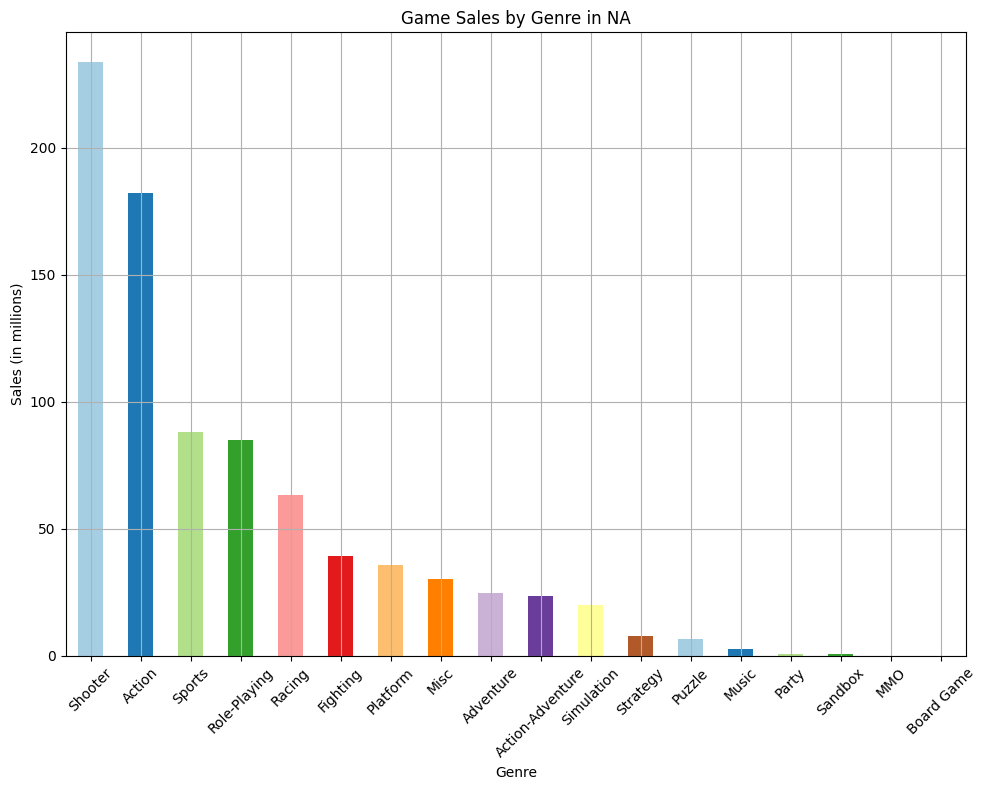

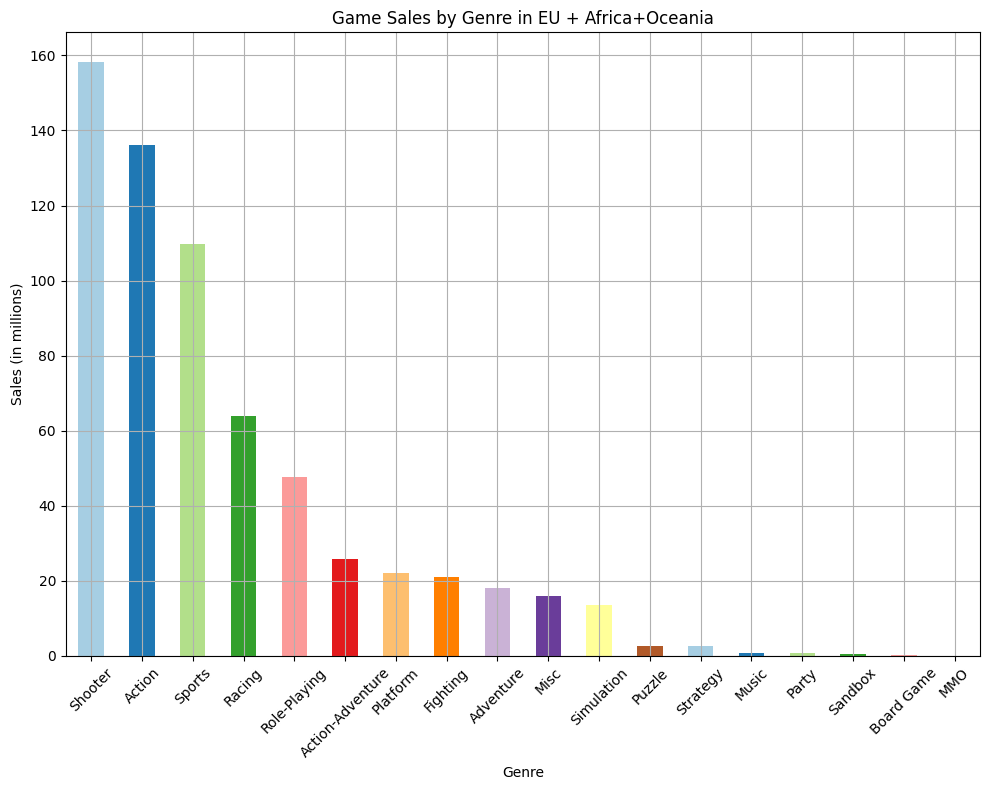

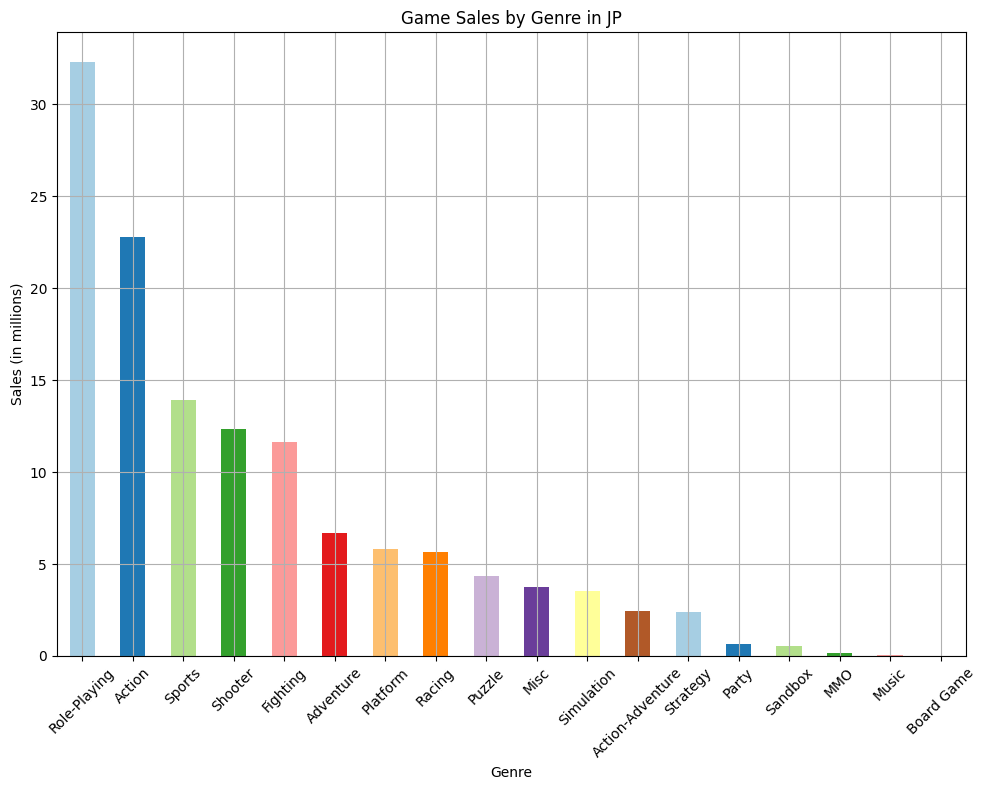

In [61]:
##Plots "The most popular genres in each region"
regions = list(genres_by_region.columns)
for region in regions:
    genre_by_region_sorted = genres_by_region.sort_values(by=region, ascending=False)
    plt.figure(figsize=(10,8))
    genre_by_region_sorted[region].plot(kind="bar", color=sns.color_palette("Paired"), rot=45)
    if(region[:3]) == "pal":
        plt.title(f"Game Sales by Genre in EU + Africa+Oceania")
    else:
        plt.title(f"Game Sales by Genre in {region.split('_')[0].upper()}")
    plt.xlabel("Genre")
    plt.ylabel("Sales (in millions)")
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"images/{region.split('_')[0].upper()}_genre_sales_plot.png", dpi=300, bbox_inches="tight")
    plt.show()

Shooter, Action and sports are the most popular game genres in all the regions except Japan. In Japan Shooter is replaced with Role Play games.

Now we are going to see if critic score effects game sales in different regions

In [62]:
##Correlation of different parameters
correlation = df[["na_sales", "pal_sales", "jp_sales","total_sales", "critic_score"]]
correlation.corr()

,na_sales,pal_sales,jp_sales,total_sales,critic_score
na_sales,1.000000,0.726636,0.111326,0.919019,0.361145
pal_sales,0.726636,1.000000,0.221777,0.929689,0.318030
jp_sales,0.111326,0.221777,1.000000,0.258096,0.146920
total_sales,0.919019,0.929689,0.258096,1.000000,0.371258
critic_score,0.361145,0.318030,0.146920,0.371258,1.000000


In [76]:
##Preparing top 5 publishers  data
top5_publishers = df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False)[:5]
top5_publishers

publisher
Activision         272.39
Electronic Arts    240.05
Rockstar Games     183.18
Ubisoft            121.05
EA Sports          114.02
Name: total_sales, dtype: float64

In [79]:
##func for legend 
def func(pct, allvals):
    absolute = round(pct/100. * np.sum(allvals),2)
    return f"{pct:.1f}% \n{absolute} mil."

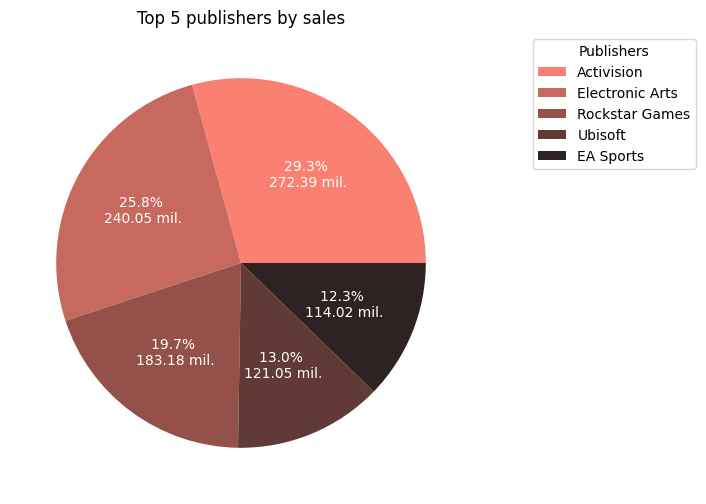

In [92]:
##PLots of publisher success
fig, ax = plt.subplots(figsize=(10,6), subplot_kw = dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(top5_publishers.values, autopct= lambda pct: func(pct, np.sum(top5_publishers.values)),
                                 textprops=dict(color="w"), colors=sns.color_palette("dark:salmon_r", n_colors=5))
ax.legend(wedges, top5_publishers.index, title = "Publishers", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Top 5 publishers by sales")
plt.savefig("images/Top5_clients.png")
plt.show()

Activision, EA, Rockstar Games, Ubisoft and EA Sports are the most succesful game publishers. Let's see what kind of genres they sell

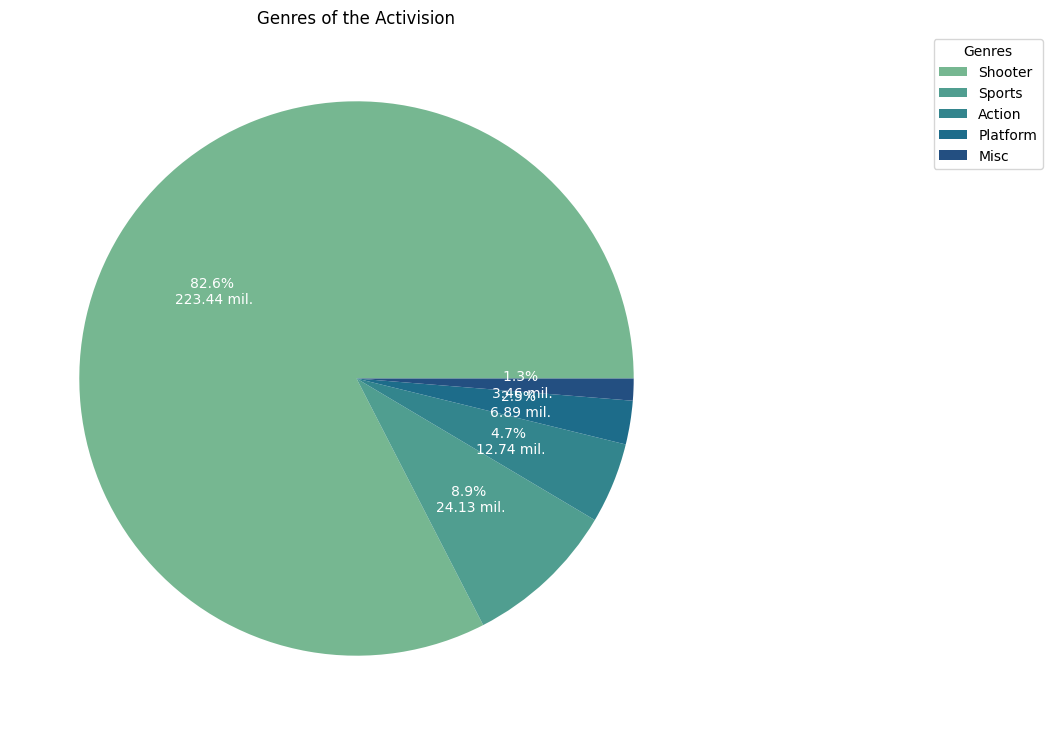

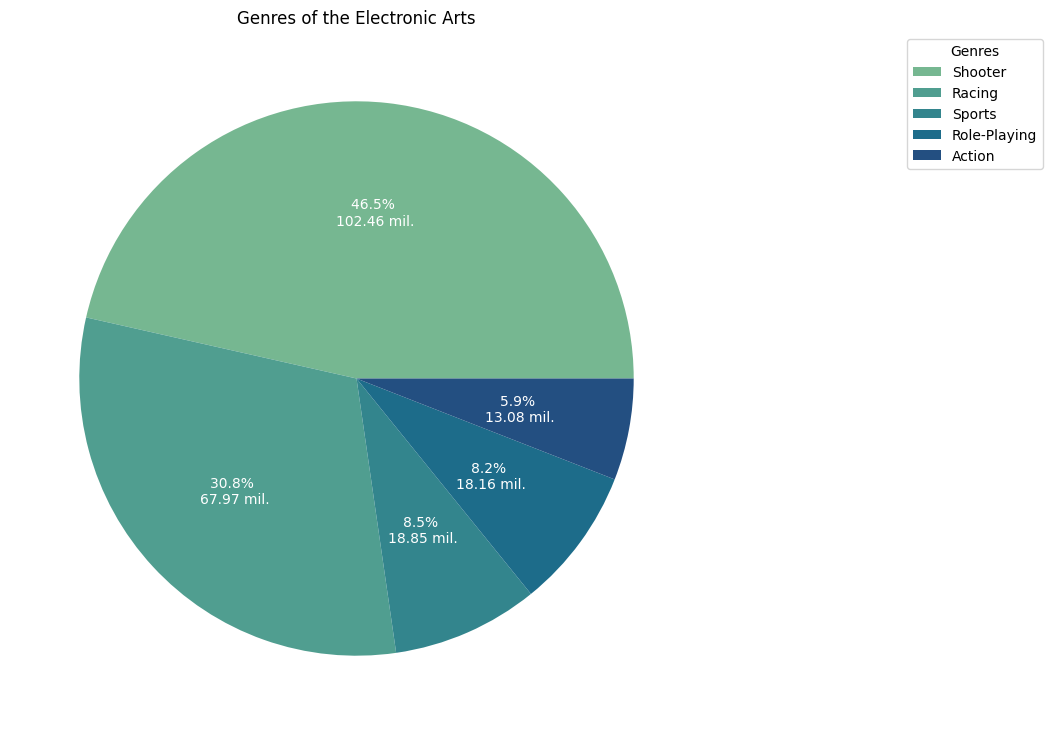

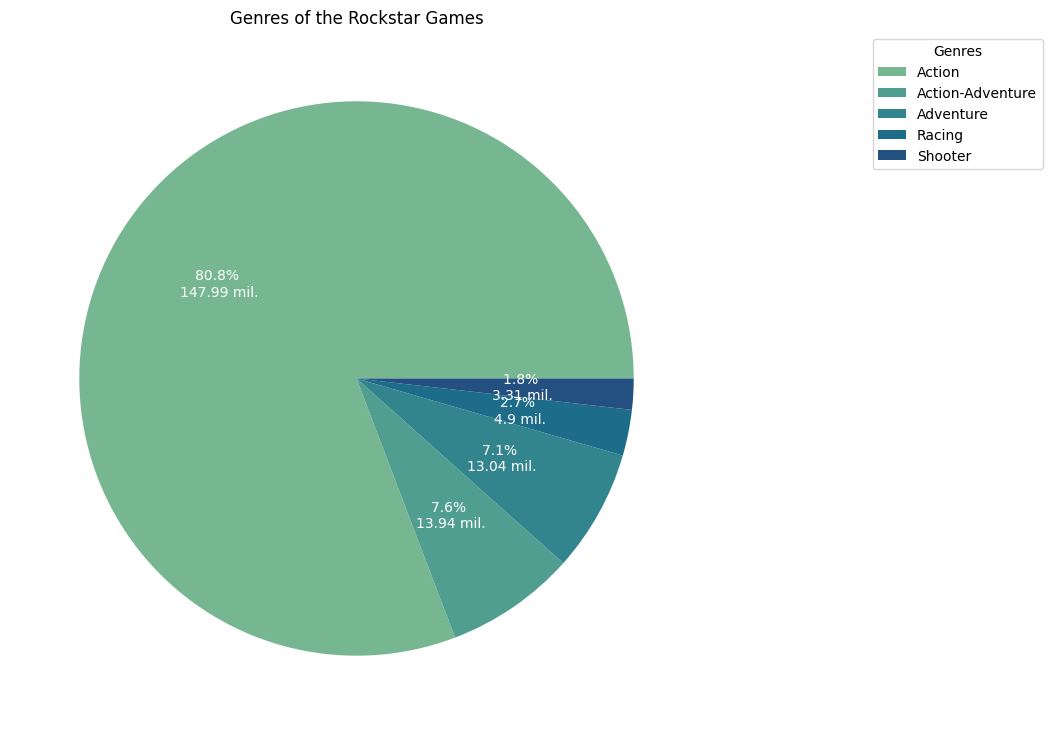

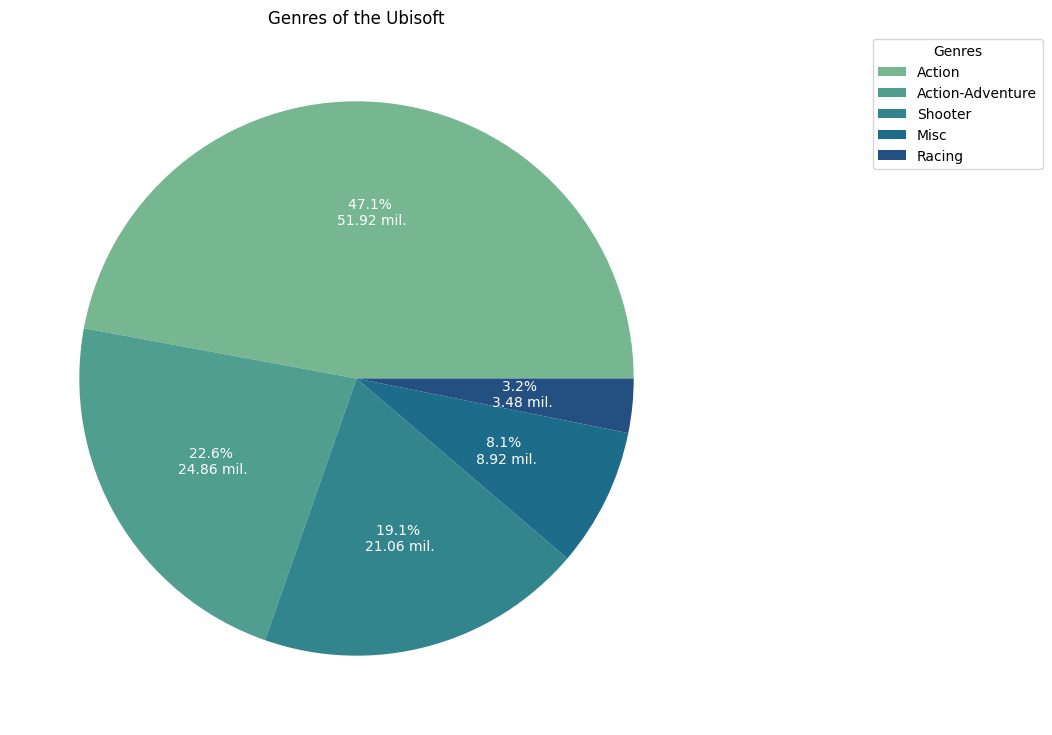

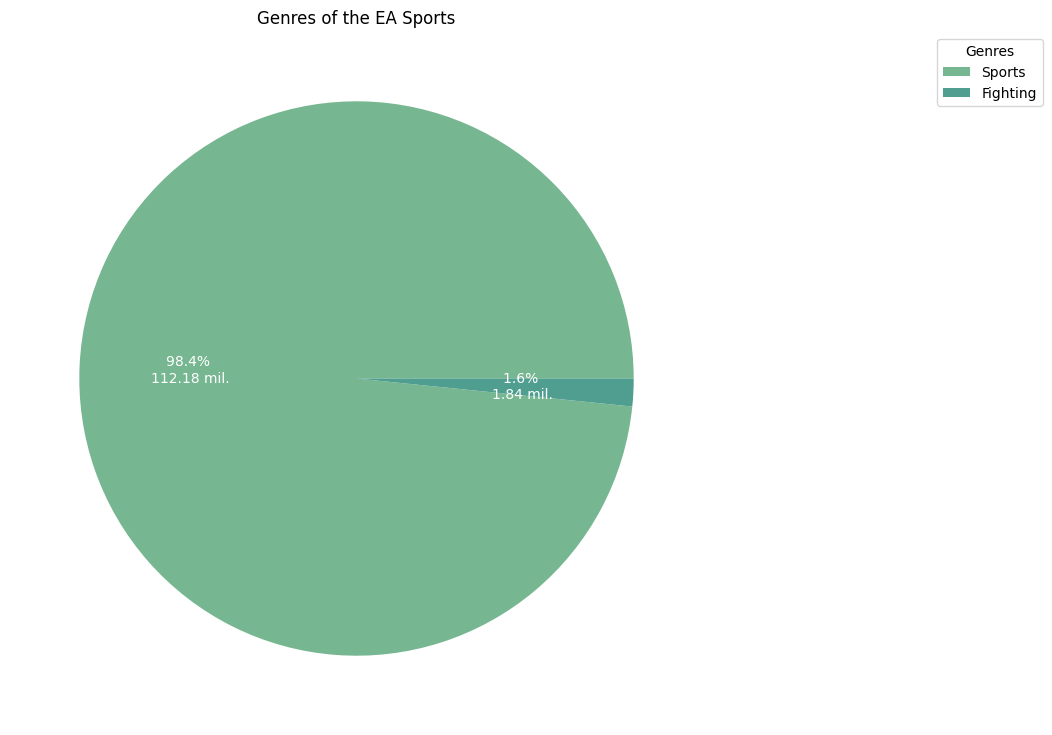

In [95]:
##Creating plots of genres of top 5 successful publishers to see the most profitable genres 
for i in top5_publishers.index:
    pieplot = df[df["publisher"] == i].groupby(by="genre")["total_sales"].sum().sort_values(ascending=False)[:5]
    ##Creating plots
    fig, ax = plt.subplots(figsize=(15,9), subplot_kw = dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(pieplot.values, autopct= lambda pct: func(pct, np.sum(pieplot.values)),textprops=dict(color="w"), colors=sns.color_palette("crest", n_colors=5))
    ax.legend(wedges, pieplot.index, title = "Genres", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(f"Genres of the {i}")
    plt.savefig(f"images/Top5_{i}.png")
    plt.show()

Shooter and action are the most popular genres of the publishers. It proves the popularity of the genres

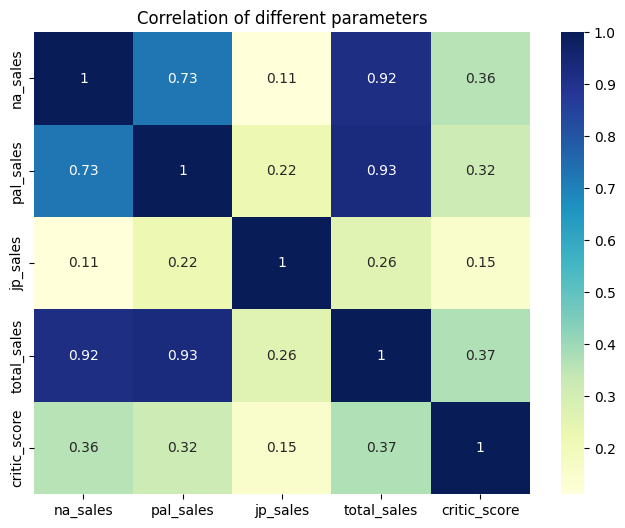

In [63]:
##Heatmap of dataset correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation of different parameters")
plt.savefig("images/Correlation.png", dpi=300, bbox_inches="tight" )
plt.show()

As we can see no strong correlation is found. So the critic scores don't have that big effect on the game popularity

## Conclusions

- **Top-Selling Genres**: Shooter, Action, and Sports dominate global sales. Japan differs by favoring Role-Playing games.
- **Platform Dominance**: PS3 and Xbox 360 led sales in 2021; PS4 is the only next-gen platform with high sales. Xbox One underperforms.
- **Regional Trends**: North America contributes the most to total sales, while Japan has the lowest.
- **Top Publishers**: Activision, EA, Rockstar Games, Ubisoft, and EA Sports are the most successful publishers. Their genre portfolios are heavily focused on Shooters and Action games, reinforcing these genres' dominance.
- **Critic Score Correlation**: No strong correlation between critic scores and total sales was found. Games can perform well even with average ratings.
- **Data Cleaning**: Visual Novel genre was excluded due to low commercial relevance. Platforms with limited market presence were filtered out to focus on dominant players.
